In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

                           **ENCODING**

In [2]:
from google.colab import files
files.upload()

Saving homeprices.csv to homeprices.csv


{'homeprices.csv': b'town,area,price\nmonroe township,2600,550000\nmonroe township,3000,565000\nmonroe township,3200,610000\nmonroe township,3600,680000\nmonroe township,4000,725000\nwest windsor,2600,585000\nwest windsor,2800,615000\nwest windsor,3300,650000\nwest windsor,3600,710000\nrobinsville,2600,575000\nrobinsville,2900,600000\nrobinsville,3100,620000\nrobinsville,3600,695000\n'}

In [3]:
df=pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [4]:
dummies=pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [5]:
merged=pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [6]:
final=merged.drop(['town','west windsor'],axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [8]:
X=final.drop(["price"],axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [9]:
Y=final.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [10]:
model.fit(X,Y)

LinearRegression()

In [11]:
model.predict(X)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [12]:
model.predict([[2800,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [13]:
model.predict([[3000,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([630482.69189422])

In [14]:
model.score(X,Y)

0.9573929037221872

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
df.town=le.fit_transform(df.town)
df

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [22]:
x=df[["town","area"]].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [23]:
y=df[["price"]].values
y

array([[550000],
       [565000],
       [610000],
       [680000],
       [725000],
       [585000],
       [615000],
       [650000],
       [710000],
       [575000],
       [600000],
       [620000],
       [695000]])

In [21]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [24]:
x=ct.fit_transform(x)

In [26]:
x=x[:,1:]
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [27]:
model.fit(x,y)

LinearRegression()

In [28]:
model.predict([[0,1,3400]])

array([[681241.6684584]])

In [29]:
model.predict([[1,0,2800]])

array([[590775.63964739]])

In [30]:
from google.colab import files
files.upload()

Saving carprices.csv to carprices.csv


{'carprices.csv': b'Car Model,Mileage,Sell Price($),Age(yrs)\nBMW X5,69000,18000,6\nBMW X5,35000,34000,3\nBMW X5,57000,26100,5\nBMW X5,22500,40000,2\nBMW X5,46000,31500,4\nAudi A5,59000,29400,5\nAudi A5,52000,32000,5\nAudi A5,72000,19300,6\nAudi A5,91000,12000,8\nMercedez Benz C class,67000,22000,6\nMercedez Benz C class,83000,20000,7\nMercedez Benz C class,79000,21000,7\nMercedez Benz C class,59000,33000,5\n'}

In [31]:
rew=pd.read_csv("carprices.csv")
rew

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
rew['Car Model']=le.fit_transform(rew['Car Model'])
rew

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


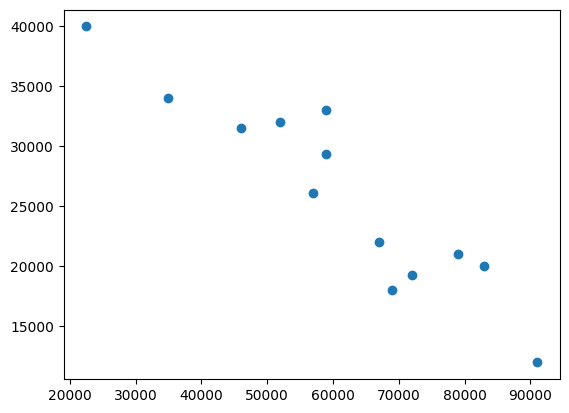

In [34]:
plt.scatter(rew[['Mileage']],rew[['Sell Price($)']])

In [40]:
x=rew.drop("Sell Price($)",axis="columns").values
x

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]])

In [41]:
y=rew["Sell Price($)"].values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000])

In [42]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()

In [43]:
le.fit(x,y)

LinearRegression()

In [44]:
le.predict([[2,4,45000]])     #Price of mercedez benz that is 4 yr old with mileage 45000

array([11372222.14471269])

In [45]:
le.predict([[1,7,86000]])              #Price of BMW X5 that is 7 yr old with mileage 86000

array([21686138.9628036])

In [47]:
le.score(x,y)

0.8719970367825953

In [ ]:
# Finished by SHAMEER SHAHUL M